In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

pd.set_option("display.max_rows", 101)
pd.set_option('display.max_columns',50)

In [5]:
with open('pitching_data.pkl', 'rb') as cellar:
    pitch_dict = pickle.load(cellar)
pitch_df = pitch_dict['LgAvg']

In [6]:
pitch_df = pitch_df.replace(to_replace='',value=np.nan)
pitch_df['Year']=pitch_df.index.astype(int)
pitch_df = pitch_df.astype(float)

In [7]:
pitch_df.dtypes

#P      float64
PAge    float64
RA/G    float64
W       float64
L       float64
W-L%    float64
ERA     float64
G       float64
GS      float64
GF      float64
CG      float64
tSho    float64
cSho    float64
SV      float64
IP      float64
H       float64
R       float64
ER      float64
HR      float64
BB      float64
IBB     float64
SO      float64
HBP     float64
BK      float64
WP      float64
BF      float64
ERA+    float64
FIP     float64
WHIP    float64
H9      float64
HR9     float64
BB9     float64
SO9     float64
SO/W    float64
LOB     float64
Year    float64
dtype: object

In [13]:
pitch_rate_df = pd.concat([pitch_df['Year'],pitch_df['ERA'],pitch_df['HR9'],
                          pitch_df['BB9'],pitch_df['SO9'],pitch_df['SO/W'],
                          pitch_df['WHIP']],axis=1)

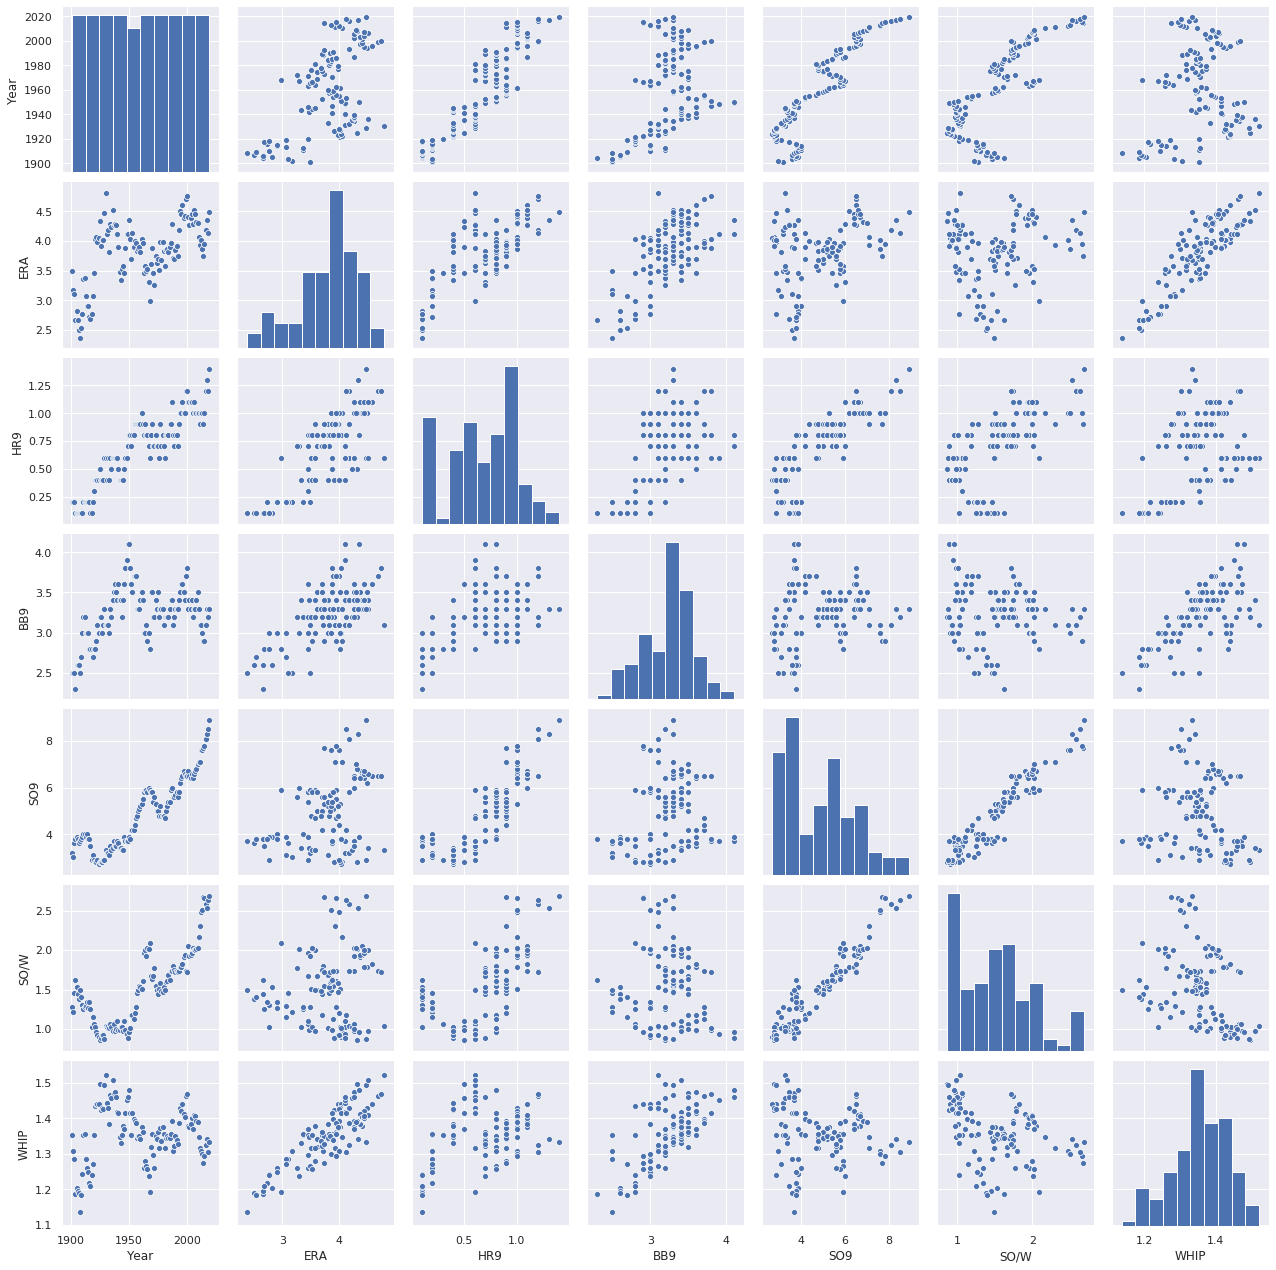

In [14]:
sns.pairplot(pitch_rate_df)

The same clearly defined time series track for strikeouts is visible, and it seems clear that walks are much more random. The SO/W is dominated by the SO number. SO vs. BB is just a blob.

WHIP vs. ERA is broadly correlated with some visible stratification. I dropped FIP because it tracked ERA almost exactly, and dropped ERA+ since it is normalized to 100 every year.

I think taking SO9 and ERA as the standard bearers for pitching is the takeaway.

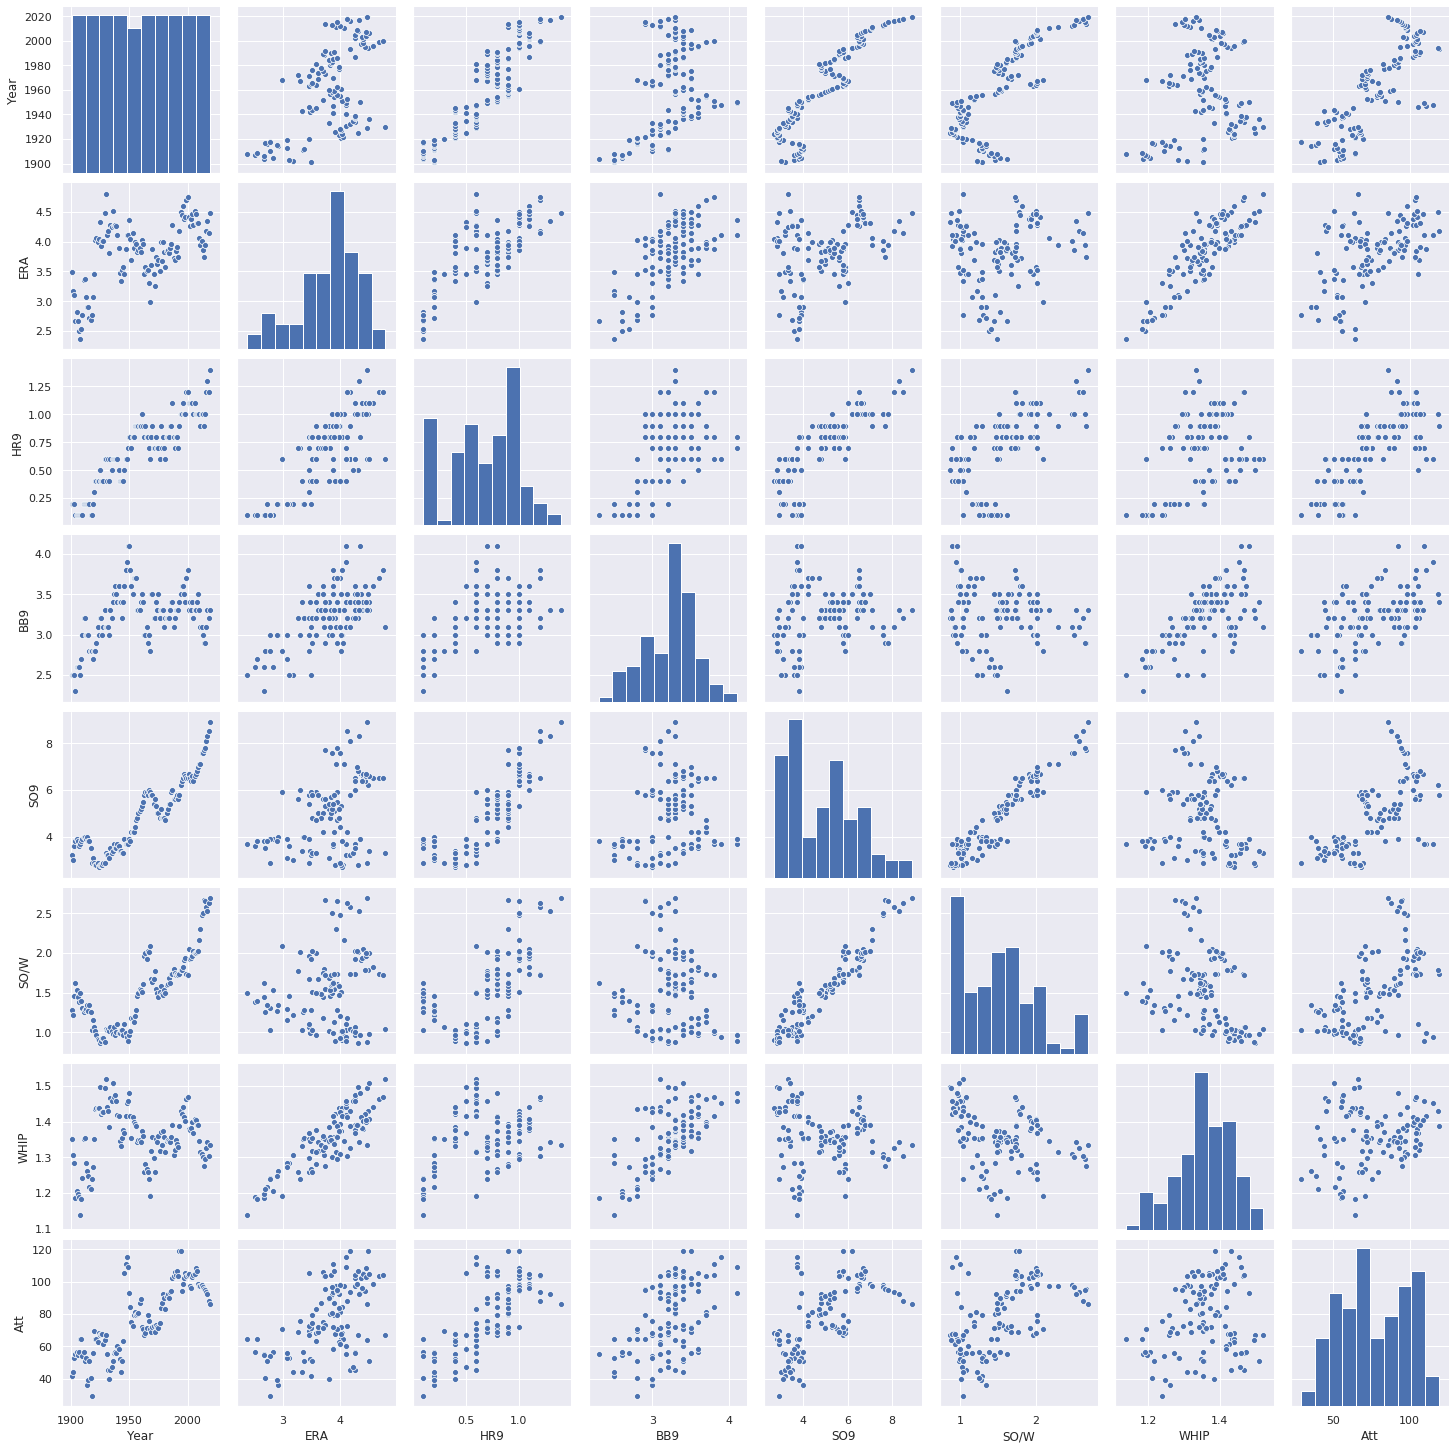

In [15]:
with open('bb-int.pkl','rb') as cellar:
    att_df = pickle.load(cellar)
pitch_rate_df['Att']=att_df['NormAtt/G'] * 1000000
sns.pairplot(pitch_rate_df)

The more stuff I look at, the more I think the takeaway is:
* Use a second-order polynomial routine to capture optima.
* The game has gotten out of hand. We got to a maximum, but now the game is too extreme, all about strikeouts, home runs, and pitching changes.

In [16]:
with open('pitch_rate_data.pkl', 'wb') as cellar:
    pickle.dump(pitch_rate_df, cellar)